In [2]:
import pandas as pd
from DataTransform import DataTransform
from DataFrameInfo import DataFrameInfo
from DataFrameTransform import DataFrameTransform
from Plotter import Plotter


In [3]:
transformer = DataTransform()

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

In [5]:
df = pd.read_csv('/Users/moustafarashed/EDA_Projects/exploratory-data-analysis---customer-loans-in-finance410/loan_payments.csv')

In [6]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [7]:
unique_count = df.nunique()

# Creating a DataFrame to display column names and their unique value counts
unique_count_df = pd.DataFrame({'Column Name': unique_count.index, 'Unique Values Count': unique_count.values})

# Displaying the DataFrame
print(unique_count_df)

                    Column Name  Unique Values Count
0                            id                54231
1                     member_id                54231
2                   loan_amount                 1083
3                 funded_amount                 1122
4             funded_amount_inv                 5261
5                          term                    2
6                      int_rate                  457
7                    instalment                19940
8                         grade                    7
9                     sub_grade                   35
10            employment_length                   11
11               home_ownership                    5
12                   annual_inc                 6132
13          verification_status                    3
14                   issue_date                   61
15                  loan_status                    9
16                 payment_plan                    2
17                      purpose               

In [8]:
categorical_columns = ['term', 'grade','sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status','payment_plan', 'purpose', 'policy_code', 'application_type']

In [9]:
df = transformer.convert_to_categorical(df, categorical_columns)

In [10]:
date_time_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date'	,'last_credit_pull_date']

In [11]:
df = transformer.convert_to_datetime(df, date_time_columns)

In [12]:
numeric_columns = ['funded_amount',	'funded_amount_inv','annual_inc', 'mths_since_last_delinq',	'mths_since_last_record','mths_since_last_major_derog']

In [13]:
df = transformer.convert_to_numeric(df, numeric_columns)

In [14]:
nan_counts = df[numeric_columns].isna().sum()
nan_counts

funded_amount                   3007
funded_amount_inv                  0
annual_inc                         0
mths_since_last_delinq         31002
mths_since_last_record         48050
mths_since_last_major_derog    46732
dtype: int64

In [15]:
df_info  = DataFrameInfo(df)

In [16]:
print(df_info.check_data_types())
print(df_info.statistical_values())
print(df_info.count_distinct_values())

print(df_info.null_values())
print(df_info.percentage_null_values())
df_info.print_df_shape()

id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                 category
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

In [17]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
correlation_matrix

,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,mths_since_last_major_derog
id,1.000000,0.994194,0.133721,0.144593,0.168081,0.059191,0.137922,0.042435,0.200950,0.063277,-0.093655,-0.008736,0.040149,0.152285,0.102478,0.477006,0.477045,-0.155466,-0.130137,-0.164642,-0.054807,-0.050619,-0.027131,-0.019734,-0.019755,0.074235,0.019431
member_id,0.994194,1.000000,0.139449,0.150845,0.175582,0.063905,0.144176,0.042157,0.203388,0.063588,-0.097866,-0.007774,0.056653,0.152161,0.101851,0.480901,0.480941,-0.149894,-0.123159,-0.160132,-0.048856,-0.052497,-0.027103,-0.020451,-0.015981,0.072470,0.018437
loan_amount,0.133721,0.139449,1.000000,0.993946,0.975248,0.214254,0.947109,0.369098,0.093865,0.014964,-0.037443,-0.035496,0.066335,0.213563,0.251376,0.468082,0.468013,0.803559,0.796104,0.690440,0.722609,0.031843,0.115411,0.068114,0.347710,0.001291,-0.084200
funded_amount,0.144593,0.150845,0.993946,1.000000,0.982458,0.217039,0.955657,0.365590,0.097991,0.017549,-0.038224,-0.037911,0.064872,0.215292,0.251613,0.479782,0.479743,0.803652,0.797465,0.689724,0.724015,0.031043,0.114483,0.068124,0.346834,0.003480,-0.086366
funded_amount_inv,0.168081,0.175582,0.975248,0.982458,1.000000,0.221346,0.935176,0.355221,0.110524,0.017829,-0.062726,-0.013152,0.271719,0.215142,0.249751,0.490670,0.490658,0.784299,0.811478,0.670666,0.715332,0.016511,0.107254,0.059931,0.345458,0.004002,-0.084089
int_rate,0.059191,0.063905,0.214254,0.217039,0.221346,1.000000,0.201341,0.003225,0.180900,0.112172,0.173122,-0.054007,0.082883,0.036295,-0.018141,0.192588,0.192690,0.164649,0.170995,0.003403,0.497549,0.049681,0.116766,0.061321,0.105466,0.033510,-0.005946
instalment,0.137922,0.144176,0.947109,0.955657,0.935176,0.201341,1.000000,0.370811,0.092766,0.028720,-0.017155,-0.046921,0.029580,0.213723,0.233760,0.390356,0.390337,0.798257,0.789048,0.715248,0.640433,0.039302,0.107479,0.068185,0.331314,0.004964,-0.080800
annual_inc,0.042435,0.042157,0.369098,0.365590,0.355221,0.003225,0.370811,1.000000,-0.162667,0.055125,0.048228,-0.053764,-0.082168,0.187463,0.263617,0.143281,0.143247,0.324147,0.316971,0.304140,0.227689,0.013349,0.025027,0.020181,0.155303,0.006151,-0.086535
dti,0.200950,0.203388,0.093865,0.097991,0.110524,0.180900,0.092766,-0.162667,1.000000,0.006949,-0.019287,0.020858,0.139728,0.327777,0.250189,0.170522,0.170524,0.006111,0.019277,-0.034343,0.108614,-0.020738,0.015797,0.003783,-0.012101,0.012154,0.027833
delinq_2yrs,0.063277,0.063588,0.014964,0.017549,0.017829,0.112172,0.028720,0.055125,0.006949,1.000000,0.010199,-0.565357,-0.051651,0.059827,0.118041,0.051672,0.051657,-0.003839,-0.003034,-0.021694,0.043543,0.023638,0.009783,0.009174,-0.003006,0.026176,-0.457372


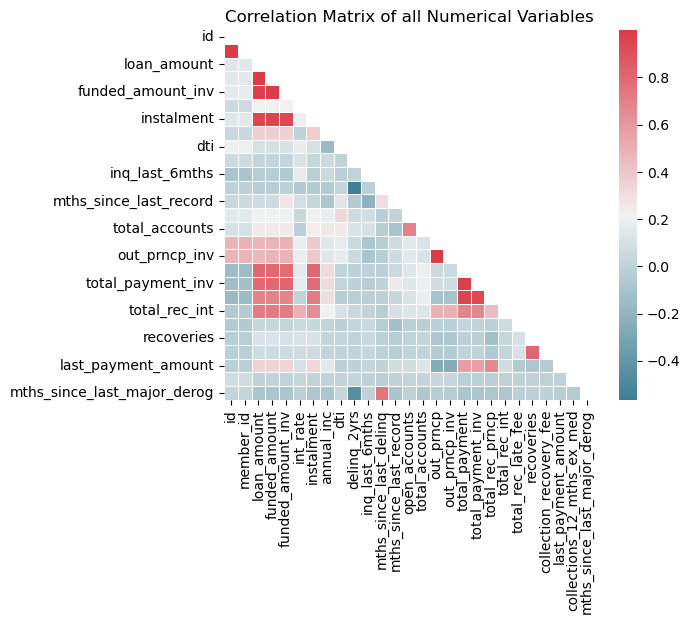

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the correlation matrix
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [19]:
df_transform = DataFrameTransform(df)

In [20]:
column_to_drop = ['funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'employment_length', 'mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date','mths_since_last_major_derog']


In [21]:
#file keeps freezing when i use the method in the class, so i directly used pandas to handle the missing values
df = df.drop(columns=column_to_drop, axis=1)
#how can i use the p value to check the MCAR????

In [22]:
df.head()

,id,member_id,loan_amount,instalment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,248.82,A,A4,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,407.52,A,A3,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,497.63,A,A4,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,514.93,C,C4,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,456.54,A,A1,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL


In [28]:
df.isnull().sum()

id                            0
member_id                     0
loan_amount                   0
instalment                    0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_date                    0
loan_status                   0
payment_plan                  0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_credit_line          0
inq_last_6mths                0
open_accounts                 0
total_accounts                0
out_prncp                     0
out_prncp_inv                 0
total_payment                 0
total_payment_inv             0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_payment_date             0
last_payment_amount           0
last_credit_pull_date         0
collecti

In [24]:
df['last_payment_date'].fillna(df['last_payment_date'].mode()[0], inplace=True)

In [25]:
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mean(), inplace=True)

In [26]:
df['last_credit_pull_date'].fillna(df['last_credit_pull_date'].mode()[0], inplace=True)

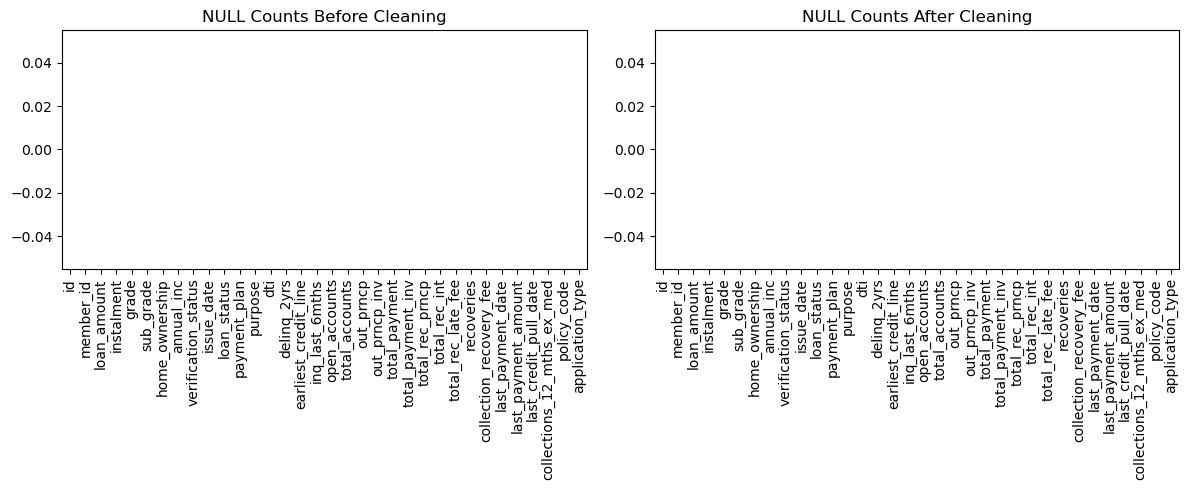

In [27]:
# Create an instance of the Plotter class
plotter = Plotter()

# Assuming 'df' is your DataFrame, pass it to the visualize_nulls method
plotter.visualize_nulls(df)